## Simulation des Action:
pour simuler une action il faut:
## Rapelles sur la fonction de répartition :
fX(x) = p(X<=x) , fonction de répartition de X
on rapelle </br>
lim x => -infini FX(x) = 0,
lim Fx en + infini = 1,
X-> Fx appartien a 0,1 </br>
## rapelle fonction de densité:
ON dit que X admet une densité , ou la Fonction de répartition est égale a </br>
Fx = intégrale de (- infini -> x) g(y) dy.
## inverse généralisé de la fonction de répartition F-1(x)
F-1(y) = inf {x : F(x)>=y } </br>
et on la définiti essentiellement sur  y qui appartient a ]0,1[ car : </br>
F-1(0) =  inf {x : F(x)>=0 } = inf \]-inf,+inf[ = -inf
### proposition :
si U est une loi uniforme sur [0,1] alors : F-1x(U) suit la meme loi que X.( Prouvé dans le cours Monte Carclo)
#### remarque :
U est une loi uniforme sur[a,b] signifie que densité de u g(x) = 1/b-a * indicatrice[a,b] </br>
## résultats:
pour simuler des variables aléatoire de loi X il suffit de simuler les valeurs d'une loi U uniforme sur (0,1) et alors d'obtenir F-1X(U),quand on connait Fx-1.

[0.30245946 0.7724807  0.01450896 0.55525899 0.43338345 0.98817167
 0.50894087 0.0199885  0.42316596 0.43802334]
[2 3 1 2 2 4 2 1 2 2]


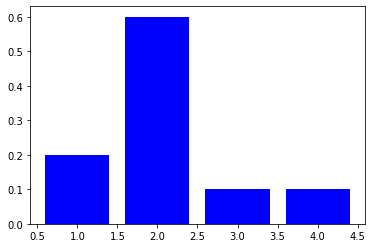

In [5]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

def F(u): #F=Fx-1
    y=1*(u<1/5)+2*(1/5<=u)*(u<7/10)+3*(7/10<=u)*(u<19/20)+4*(u>19/20)
    return y

N=10 #la taille de l'echantillon

U=sim.ranf((N,))#loi uniforme sur [0,1]
print(U)
X=F(U)
print(X)

frq= np.arange(0,4,dtype=float)
for i in range(0,4):
    frq[i]=np.sum(1*(X==i+1))/N

larg=0.8 #lar rectangles
ax1=np.array([1,2,3,4])
hoistX=plt.bar(ax1,frq,larg,color='b')
plt.show()

## Simulations de risques, moyenne relative
ici le chema est le suivant

![Course](images/img1.png)
<img src="images/img1.png" width="800" height="400">


NameError: name 'S' is not defined